# CODE TO CLASSIFY YELP REVIEWS (NLP)

## PROBLEM STATEMENT

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 




## STEP 0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 1 Import data

In [2]:
df=pd.read_csv("yelp.csv")

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
#No Null entries !

In [13]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [14]:
df['text'][1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [17]:
df['text'][9999]

'4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and Spinatos is at the top of my pizza fix list.. the semi sweet sauce is addictive, great service, fresh ingredients, The Spicy Italian is my favorite... The chocolate chips cookies are laced with mind altering drugs, that make your body parts"romantic" when you think of their cookies.. BTW 5:30pm, on a Tuesday, when we left, a 30 minute wait.. Its on the List..'

## STEP 2 Visualise the Dataset

In [26]:
df['Reviews_len']=df['text'].apply(len)

In [29]:
df.drop(columns=['Review_len'],inplace=True)

In [30]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Reviews_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


<Axes: xlabel='Reviews_len', ylabel='Count'>

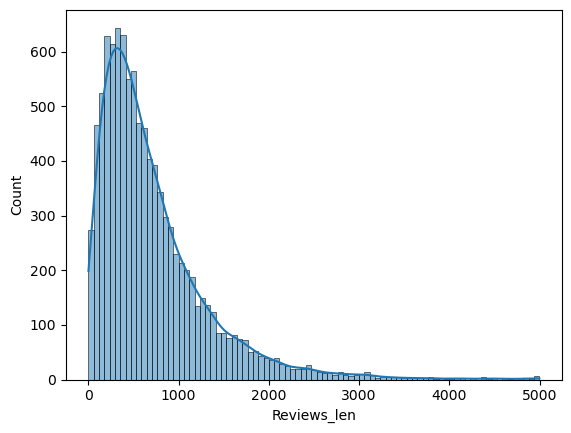

In [32]:
sns.histplot(df['Reviews_len'],kde=True)

In [35]:
df['Reviews_len'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: Reviews_len, dtype: float64

In [39]:
for index,row in df.iterrows():
    if(df['Reviews_len'][index]==4997):
        print(row)
        print(df['text'][index])

business_id                               FCcFT610nQBVcRdY-devQA
date                                                  2012-01-14
review_id                                 6jRs2P6zTYMn36fVnCu1Zw
stars                                                          4
text           In our continuing quest to identify cool, loca...
type                                                      review
user_id                                   40aklZ2SQPKnlTPZdvAqww
cool                                                           0
useful                                                         1
funny                                                          0
Reviews_len                                                 4997
Name: 55, dtype: object
In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. 

Before I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Ea

In [40]:
for index,row in df.iterrows():
    if(df['Reviews_len'][index]==1):
        print(row)
        print(df['text'][index])

business_id    tbRu-3NR5za1SEZkszcp5Q
date                       2012-01-03
review_id      IVoMGfn9QrZ4dATwc9HBcg
stars                               3
text                                X
type                           review
user_id        SHcX9hp5RG3-OqsbvissIQ
cool                                0
useful                              0
funny                               0
Reviews_len                         1
Name: 6450, dtype: object
X


In [41]:
for index,row in df.iterrows():
    if(df['Reviews_len'][index]==711):
        print(row)
        print(df['text'][index])

business_id                               V3lQtk1LgwAEcF9j-BzchA
date                                                  2012-10-23
review_id                                 ExhhNpUulh2Yjog-nb6O7A
stars                                                          5
text           I'm from Chicago so I'm picky with my pizza--t...
type                                                      review
user_id                                   LZxnr-c-VsG0N4Ef-9iAyg
cool                                                           0
useful                                                         0
funny                                                          0
Reviews_len                                                  711
Name: 138, dtype: object
I'm from Chicago so I'm picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni

<Axes: xlabel='count', ylabel='stars'>

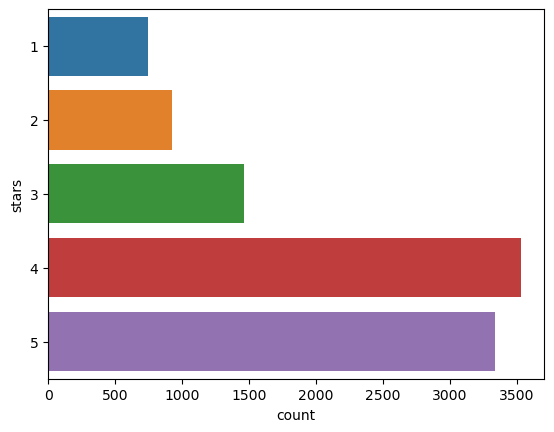

In [43]:
sns.countplot(y='stars',data=df)

In [44]:
df['stars'].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


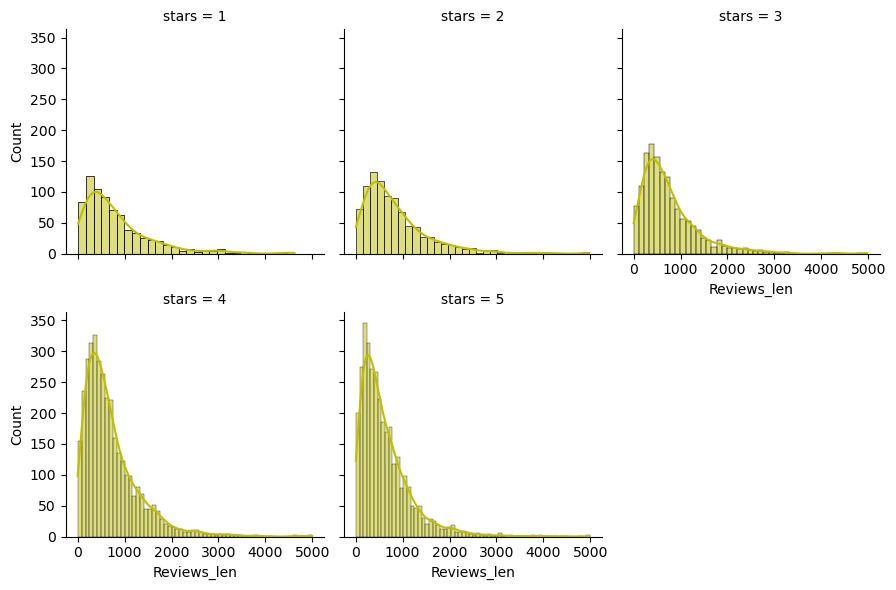

In [52]:

g=sns.FacetGrid(data=df,col='stars',col_wrap=3)

#g.map(plt.hist,'Reviews_len',bins=20,color='b')
g.map(sns.histplot,'Reviews_len',kde=True,color='y')

### Making a df for only 1 star and 5 star reviews 

In [53]:
df_1=df[df['stars']==1]

In [54]:
df_5=df[df['stars']==5]

In [57]:
df_5_1=pd.concat([df_1,df_5])

In [58]:
df_5_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Reviews_len
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [60]:
df_5_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  Reviews_len  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [64]:
print("1 stars reivew % = ",(len(df_1)/len(df_5_1))*100,"%")
print("5 stars reivew % = ",(len(df_5)/len(df_5_1))*100,"%")

1 stars reivew % =  18.330885952031327 %
5 stars reivew % =  81.66911404796868 %


## Step 3 Creating Testing and Training Data & Data Cleaning

## Remove Punctuations from Reviews 

In [67]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
Test="Hello, Hi how are you??, HELLO !, My name is abhishek das and i study in IITG"


In [102]:
Test_punc_remove=[char for char in Test if char not in string.punctuation ]

In [103]:
Test_punc_remove

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'H',
 'i',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'H',
 'E',
 'L',
 'L',
 'O',
 ' ',
 ' ',
 'M',
 'y',
 ' ',
 'n',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'a',
 'b',
 'h',
 'i',
 's',
 'h',
 'e',
 'k',
 ' ',
 'd',
 'a',
 's',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'i',
 ' ',
 's',
 't',
 'u',
 'd',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'I',
 'I',
 'T',
 'G']

In [104]:
Test_punc_remove_join=''.join(Test_punc_remove)

In [105]:
Test_punc_remove_join

'Hello Hi how are you HELLO  My name is abhishek das and i study in IITG'

## Removing Stopwords 

In [106]:
from nltk.corpus import stopwords

stopwords.words('english')

stop_words = set(stopwords.words('english'))

In [107]:
Test_cleaned = [word for word in Test_punc_remove_join.split() if word.lower() not in stop_words]


In [108]:
Test_cleaned

['Hello', 'Hi', 'HELLO', 'name', 'abhishek', 'das', 'study', 'IITG']

## COUNT VECTORIZER

### Transform text into matrices 

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [112]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [113]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Cleaning our Yelp Reviews 


In [116]:
#defining a PIPELINE!

def clean(Text):
    Text_punc_remove=[char for char in Text if char not in string.punctuation]
    Text_punc_remove_join=''.join(Text_punc_remove)
    Text_cleaned = [word for word in Text_punc_remove_join.split() if word.lower() not in stop_words]
    return Text_cleaned
    


In [117]:
df_clean=df_5_1['text'].apply(clean)

In [122]:
print(df_5_1['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [121]:
print(df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [124]:
df_5_1['Reviews_len'].describe()

count    4086.000000
mean      661.938815
std       601.621371
min         6.000000
25%       256.000000
50%       489.500000
75%       878.000000
max      4986.000000
Name: Reviews_len, dtype: float64

In [127]:
for index,row in df_5_1.iterrows():
    if(df_5_1['Reviews_len'][index]==662):
        print(index)
#         print(row)
#         print(df_5_1['text'][index])
        
        

3571
7169


In [128]:
print(df_5_1['text'][3571])

Coming from a French family on my mom's side it is ingrained in my genes to love cooking, food, and shops like Sur La Table...oh and also wine and cheese...what a tough life I live!

Sur La Table is a classy cooking shop which offers high end cooking ware, appliances, and also dishes. Somethings in the store can be pricey, but you can also find good deals as well. They offer many cooking things you wouldn't find at your average Crate and Barrel for more complicated cooking endeavors. I have also found some cute cookie cutters here for my mom's collection. The staff was all very helpful and knowledgeable. and many Sur La Table's now offer cooking classes!


In [129]:
print(df_clean[3571])

['Coming', 'French', 'family', 'moms', 'side', 'ingrained', 'genes', 'love', 'cooking', 'food', 'shops', 'like', 'Sur', 'La', 'Tableoh', 'also', 'wine', 'cheesewhat', 'tough', 'life', 'live', 'Sur', 'La', 'Table', 'classy', 'cooking', 'shop', 'offers', 'high', 'end', 'cooking', 'ware', 'appliances', 'also', 'dishes', 'Somethings', 'store', 'pricey', 'also', 'find', 'good', 'deals', 'well', 'offer', 'many', 'cooking', 'things', 'wouldnt', 'find', 'average', 'Crate', 'Barrel', 'complicated', 'cooking', 'endeavors', 'also', 'found', 'cute', 'cookie', 'cutters', 'moms', 'collection', 'staff', 'helpful', 'knowledgeable', 'many', 'Sur', 'La', 'Tables', 'offer', 'cooking', 'classes']


## Applying count vectoriser

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
vectorizer=CountVectorizer(analyzer=clean) #Analyser will run the pipeline we defined
yelp_vector=vectorizer.fit_transform(df_5_1['text'])

In [137]:
print(vectorizer.get_feature_names_out())

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [138]:
print(yelp_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [139]:
yelp_vector.shape

(4086, 26435)

## STEP 4 Model Training 

In [141]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()

label=df_5_1['stars'].values #Labels of the data, basically the value of target(y)

In [142]:
model.fit(yelp_vector,label)

MultinomialNB()

In [194]:
sample_1=['amazing food!Loved the service.']
sample_2=['Bad food,made me sick']

In [195]:
sample_1_vector=vectorizer.transform(sample_1) #WE cant fit the model to text data!
prediction_1=model.predict(sample_1_vector)

In [196]:
prediction_1

array([5], dtype=int64)

In [197]:
sample_2_vector=vectorizer.transform(sample_2) #WE cant fit the model to text data!
prediction_2=model.predict(sample_2_vector)

In [198]:
prediction_2

array([1], dtype=int64)

## Dividing the data into test and train

In [200]:
from sklearn.model_selection import train_test_split

In [213]:
X=yelp_vector
y=label
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [214]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

## Step 5 Evaluating the Model 

In [215]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_train=model.predict(X_train)

In [216]:
y_predict_train

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

<Axes: >

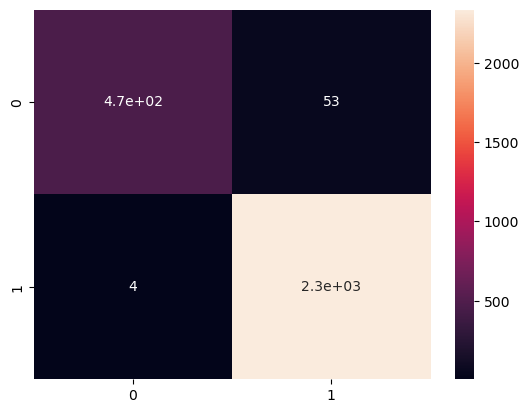

In [217]:
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

<Axes: >

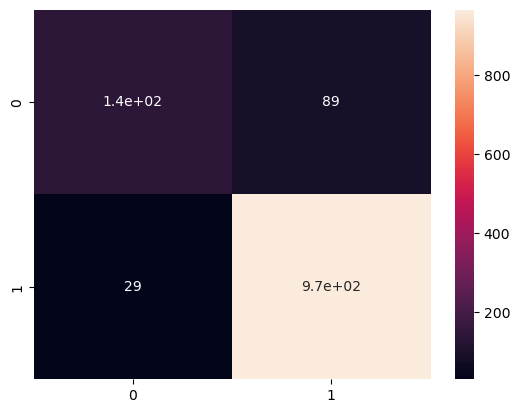

In [218]:
y_predict_test=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [234]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           1       0.83      0.61      0.71       230
           5       0.92      0.97      0.94       996

    accuracy                           0.90      1226
   macro avg       0.87      0.79      0.82      1226
weighted avg       0.90      0.90      0.90      1226



## Step 6 : Adding TF-IDF , Text Frequency - Inverse Document Frequency 

In [235]:
from sklearn.feature_extraction.text import TfidfTransformer
df_tfidf=TfidfTransformer().fit_transform(yelp_vector)

In [236]:
df_tfidf.shape

(4086, 26435)

In [238]:
print(df_tfidf)

  (0, 26268)	0.08050274254786693
  (0, 26228)	0.09348620453726474
  (0, 26144)	0.07169873884062605
  (0, 26045)	0.15817660070664968
  (0, 25776)	0.06066174442364943
  (0, 25773)	0.12002965112412296
  (0, 25418)	0.14546095084580743
  (0, 25122)	0.2703898166869907
  (0, 24911)	0.14546095084580743
  (0, 24670)	0.12383875478045604
  (0, 24644)	0.13058459416402163
  (0, 24623)	0.04459768543876988
  (0, 24154)	0.06030465665278142
  (0, 23120)	0.09876367605721408
  (0, 22450)	0.09315710247790514
  (0, 22430)	0.1097636086218109
  (0, 22000)	0.06662808805692144
  (0, 21801)	0.13058459416402163
  (0, 20785)	0.09005184530467268
  (0, 19733)	0.14546095084580743
  (0, 19354)	0.09547907116641852
  (0, 19039)	0.12613266766643505
  (0, 18911)	0.1133722206104443
  (0, 18805)	0.10789642494273591
  (0, 18740)	0.08834411964653922
  :	:
  (4085, 16843)	0.12124793979515064
  (4085, 15626)	0.056073903602148346
  (4085, 15041)	0.08518302578980794
  (4085, 14689)	0.13505937049458547
  (4085, 14480)	0.085183025

In [240]:
X = df_tfidf
y=label


In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [242]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

<Axes: >

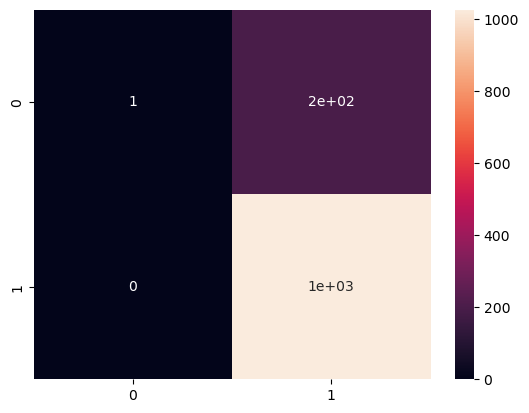

In [243]:
y_predict_test=model.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [244]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       201
           5       0.84      1.00      0.91      1025

    accuracy                           0.84      1226
   macro avg       0.92      0.50      0.46      1226
weighted avg       0.86      0.84      0.76      1226



### This made the results worse, but this is one feature that we can add when dealing with Texts